In [1]:
import os
import sys
sys.path.insert(0, "..")
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Load dataframes
suppress_rule_df = pd.read_csv("../../_dump/theory_attacks/theory_suppress_rule.csv")
knowledge_amnesia_df = pd.read_csv("../../_dump/theory_attacks/theory_knowledge_amnesia.csv")
coerce_state_variance_df = pd.read_csv("../../_dump/theory_attacks/theory_coerce_state_variance.csv")

In [3]:
def get_col_as_np(df, tgt_col_name, filter_kvs = [], sort_by="num_attack_tokens"):
    for k, v in filter_kvs:
        df = df[df[k].eq(v)]
    df = df.sort_values(by=[sort_by])
    x = df[sort_by].to_numpy()
    y = df[tgt_col_name].to_numpy()
    return x, y

In [4]:
# Some font size configurations
legend_fs = 18
title_fs = 20
axis_fs = 18
tick_fs = 18

<Figure size 640x480 with 0 Axes>

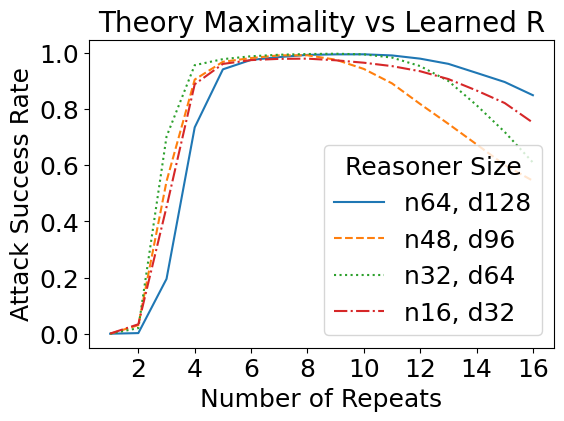

In [5]:
plt.clf()
fig = plt.figure(figsize=(6, 4))

x_64, y_64 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")]
)

x_48, y_48 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")]
)

x_32, y_32 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")]
)

x_16, y_16 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")]
)

x_64, y_64 = x_64[:16]-1, y_64[:16]
x_48, y_48 = x_48[:16]-1, y_48[:16]
x_32, y_32 = x_32[:16]-1, y_32[:16]
x_16, y_16 = x_16[:16]-1, y_16[:16]

plt.plot(x_64, y_64, linestyle="solid", label="n64, d128")
plt.plot(x_48, y_48, linestyle="dashed", label="n48, d96")
plt.plot(x_32, y_32, linestyle="dotted", label="n32, d64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n16, d32")
plt.legend(loc="lower right", title="Reasoner Size", fontsize=legend_fs, title_fontsize=legend_fs)
plt.ylabel("Attack Success Rate", fontsize=axis_fs)
plt.xlabel("Number of Repeats", fontsize=axis_fs)
plt.yticks(fontsize=tick_fs)
plt.xticks(fontsize=tick_fs)
plt.title("Theory Maximality vs Learned R", fontsize=title_fs)
# plt.title("Theory-based Attacks Against Learned Reasoners", fontsize=title_fs)
plt.savefig("images/exp2_suppress_rule_acc.png", bbox_inches="tight", transparent=True)

In [6]:
# Knowledge Amnesia

<Figure size 640x480 with 0 Axes>

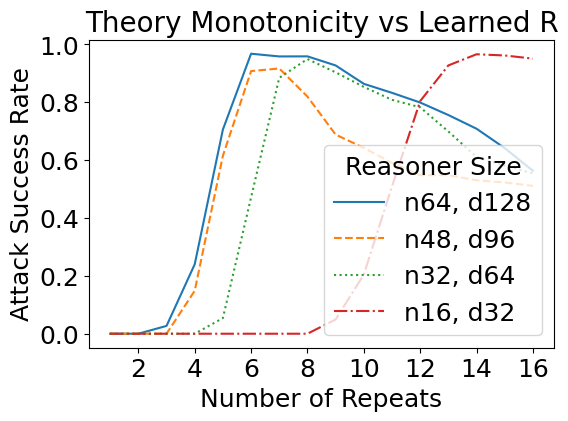

In [7]:
plt.clf()
fig = plt.figure(figsize=(6,4))

x_64, y_64 = get_col_as_np(knowledge_amnesia_df, "adv_ns3_state_acc",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")]
)

x_48, y_48 = get_col_as_np(knowledge_amnesia_df, "adv_ns3_state_acc",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")]
)

x_32, y_32 = get_col_as_np(knowledge_amnesia_df, "adv_ns3_state_acc",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")]
)

x_16, y_16 = get_col_as_np(knowledge_amnesia_df, "adv_ns3_state_acc",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")]
)

x_64, y_64 = x_64[:16]-1, y_64[:16]
x_48, y_48 = x_48[:16]-1, y_48[:16]
x_32, y_32 = x_32[:16]-1, y_32[:16]
x_16, y_16 = x_16[:16]-1, y_16[:16]

plt.plot(x_64, y_64, linestyle="solid", label="n64, d128")
plt.plot(x_48, y_48, linestyle="dashed", label="n48, d96")
plt.plot(x_32, y_32, linestyle="dotted", label="n32, d64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n16, d32")
plt.legend(loc="lower right", title="Reasoner Size", fontsize=legend_fs, title_fontsize=legend_fs)
plt.ylabel("Attack Success Rate", fontsize=axis_fs)
plt.xlabel("Number of Repeats", fontsize=axis_fs)
plt.yticks(fontsize=tick_fs)
plt.xticks(fontsize=tick_fs)
plt.title("Theory Monotonicity vs Learned R", fontsize=title_fs)
# plt.title("Theory-based Attacks Against Learned Reasoners", fontsize=title_fs)
plt.savefig("images/exp2_knowledge_amnesia_acc.png", bbox_inches="tight", transparent=True)

In [8]:
# Coercion variance

<Figure size 640x480 with 0 Axes>

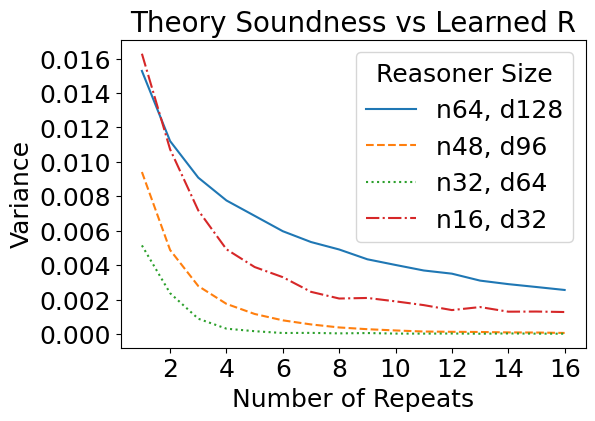

In [9]:
plt.clf()
fig = plt.figure(figsize=(6,4))

x_64, y_64 = get_col_as_np(coerce_state_variance_df, "variance",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")],
    sort_by = "num_copies",
)

x_48, y_48 = get_col_as_np(coerce_state_variance_df, "variance",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")],
    sort_by = "num_copies",
)

x_32, y_32 = get_col_as_np(coerce_state_variance_df, "variance",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")],
    sort_by = "num_copies",
)

x_16, y_16 = get_col_as_np(coerce_state_variance_df, "variance",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")],
    sort_by = "num_copies",
)


x_64, y_64 = x_64[:16], y_64[:16]
x_48, y_48 = x_48[:16], y_48[:16]
x_32, y_32 = x_32[:16], y_32[:16]
x_16, y_16 = x_16[:16], y_16[:16]

plt.plot(x_64, y_64, linestyle="solid", label="n64, d128")
plt.plot(x_48, y_48, linestyle="dashed", label="n48, d96")
plt.plot(x_32, y_32, linestyle="dotted", label="n32, d64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n16, d32")
plt.legend(loc="upper right", title="Reasoner Size", fontsize=legend_fs, title_fontsize=legend_fs)
plt.ylabel("Variance", fontsize=axis_fs)
plt.xlabel("Number of Repeats", fontsize=axis_fs)
plt.yticks(fontsize=tick_fs)
plt.xticks(fontsize=tick_fs)
# plt.yscale("log")
plt.title("Theory Soundness vs Learned R", fontsize=title_fs)
plt.savefig("images/exp2_coerce_state_var.png", bbox_inches="tight", transparent=True)